In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import robsblobs
import os
import ast
from pathlib import Path

In [2]:
monGamma_sRGB = np.array([2.2, 2.2, 2.2])
monxyY_sRGB = np.array([
    [0.6400, 0.3300, 0.2126*100],
    [0.3000, 0.6000, 0.7152*100],
    [0.1500, 0.0600, 0.0722*100]])
mon_sRGB = robsblobs.monitor.Monitor("sRGB")
mon_sRGB.set_monGamma(monGamma_sRGB)
mon_sRGB.set_monxyY(monxyY_sRGB)

Luminances[ 0 ] =  10.63
Luminances[ 1 ] =  35.76
Luminances[ 2 ] =  3.61
bigl = 32.7408794545  bigm = 17.2591205455  bigs = 0.875685127273
L/L+M = 0.654817589091  S/L+M = 0.0175137025455
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  46.4519463869
Luminances[ 2 ] =  3.54805361305
bigl = 30.3478991993  bigm = 19.6521008007  bigs = 0.875685127273
L/L+M = 0.606957983986  S/L+M = 0.0175137025455
Luminances[ 0 ] =  21.26
Luminances[ 1 ] =  25.0680536131
Luminances[ 2 ] =  3.67194638695
bigl = 35.1338597098  bigm = 14.8661402902  bigs = 0.875685127273
L/L+M = 0.702677194196  S/L+M = 0.0175137025455
Blue Yellow Axis
Luminances[ 0 ] =  8.76102451921
Luminances[ 1 ] =  41.2389754808
Luminances[ 2 ] =  0.0
bigl = 32.7408794545  bigm = 17.2591205455  bigs = 0.123327479222
L/L+M = 0.654817589091  S/L+M = 0.00246654958444
Luminances[ 0 ] =  12.4989754808
Luminances[ 1 ] =  30.2810245192
Luminances[ 2 ] =  7.22
bigl = 32.7408794545  bigm = 17.2591205455  bigs = 1.62804277532
L/L+M = 0.654

In [3]:
data = pd.read_csv('experiment_data.csv')
data["final_dkl"] = data["final_dkl"].apply(ast.literal_eval)
data["trajectory"] = data["trajectory"].apply(ast.literal_eval)

final_dkl = data["final_dkl"][0]
dkl_trajectory = np.array(data["trajectory"][0])

In [4]:
final_dkl

(-0.15000000000000008, 0.24375, 0.6611111111111111)

In [5]:
# forgot to record timestamps of stimulus frames, so roughly estimate them here
tstamps = np.zeros((len(dkl_trajectory)))
for i in range(len(tstamps)):
    if i == 0:
        tstamps[i] = 0
    else:
        tstamps[i] = tstamps[i - 1] + 1/144

In [6]:
final_dkl == dkl_trajectory[len(dkl_trajectory)-1, :]

array([ True,  True,  True], dtype=bool)

In [7]:
final_rgb = np.sqrt(robsblobs.dkl.dkl2rgb(mon_sRGB, final_dkl))

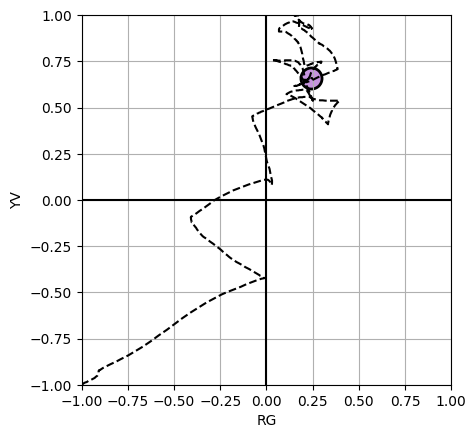

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot([0, 0], [-1, 1], 'k-')
plt.plot([-1, 1], [0, 0], 'k-')
plt.plot(dkl_trajectory[:, 1], dkl_trajectory[:, 2], 'k--')
plt.scatter(final_dkl[1], final_dkl[2], s=230, color=final_rgb, linewidths=2, edgecolors="black")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('RG')
plt.ylabel('YV')
plt.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()

(-0.5, 1919.5, 1079.5, -0.5)

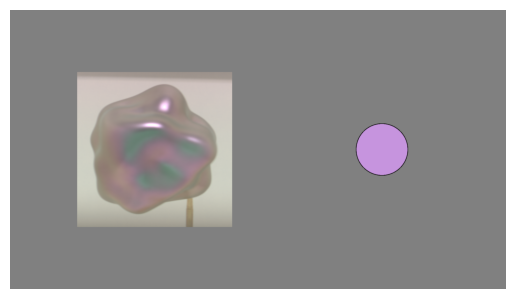

In [11]:
screen_img = plt.imread('stimulus_screen.png')
plt.imshow(screen_img)
plt.axis('off')

In [12]:
recording_location = Path(".") / "006"
surface_fixation_export = recording_location / "exports" / "000" / "surfaces" / "fixations_on_surface_Surface 1.csv"

surface_df = pd.read_csv(surface_fixation_export)

list(surface_df.columns)

['world_timestamp',
 'world_index',
 'fixation_id',
 'start_timestamp',
 'duration',
 'dispersion',
 'norm_pos_x',
 'norm_pos_y',
 'x_scaled',
 'y_scaled',
 'on_surf']

In [13]:
fixation_on_surface = surface_df[surface_df.on_surf == True]
fixation_on_surface.head(10005)

,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,21136.857594,0,0,21136.803048,217.8640,1.043675,0.397668,0.556598,0.397668,0.556598,True
1,21136.891105,1,0,21136.803048,217.8640,1.043675,0.399133,0.557311,0.399133,0.557311,True
2,21136.924615,2,0,21136.803048,217.8640,1.043675,0.398315,0.558496,0.398315,0.558496,True
3,21136.958126,3,0,21136.803048,217.8640,1.043675,0.397489,0.561536,0.397489,0.561536,True
4,21136.991636,4,0,21136.803048,217.8640,1.043675,0.398924,0.565063,0.398924,0.565063,True
...,...,...,...,...,...,...,...,...,...,...,...
1135,21171.741921,1041,181,21171.628960,157.3465,1.191525,0.708732,0.523864,0.708732,0.523864,True
1136,21171.775431,1042,181,21171.628960,157.3465,1.191525,0.708535,0.523915,0.708535,0.523915,True
1172,21173.048826,1080,187,21173.045074,84.7250,1.414176,0.350640,0.472463,0.350640,0.472463,True
1173,21173.082337,1081,187,21173.045074,84.7250,1.414176,0.350723,0.471594,0.350723,0.471594,True


In [14]:
rel_world_stamps = fixation_on_surface["world_timestamp"]
rel_world_stamps = rel_world_stamps - rel_world_stamps[0]

(-0.5, 1919.5, 1079.5, -0.5)

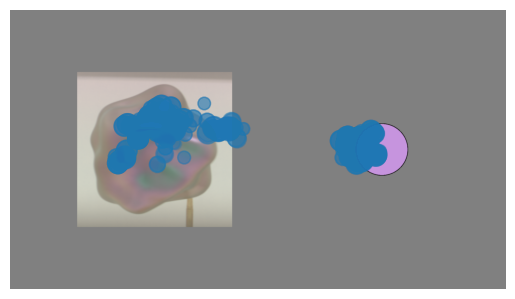

In [16]:
grid = screen_img.shape[0:2]

xs = fixation_on_surface["norm_pos_x"]
ys = fixation_on_surface["norm_pos_y"]

ys = 1 - ys

point_scale = fixation_on_surface["duration"]
id_labels = list(fixation_on_surface["fixation_id"])

plt.figure()
plt.imshow(screen_img)
plt.scatter(xs*grid[1], ys*grid[0], s=point_scale, alpha=0.2)
plt.axis('off')

In [39]:
stim_img = plt.imread('images/shape_3_color_3_ori_2_cspacesWB_resized.png')
mask = plt.imread('masks/shape_3_color_3_ori_2_cspacesWB_resized_mask.png')
rs = stim_img[:, :, 0].flatten()
gs = stim_img[:, :, 1].flatten()
bs = stim_img[:, :, 2].flatten()
mask = (mask[:, :, 0] == 1).flatten()

rs_obj = rs[mask]
gs_obj = gs[mask]
bs_obj = bs[mask]

rgbs_obj = np.array([rs_obj, gs_obj, bs_obj])

rs_obj_gc = np.power(rs[mask], 2.2)
gs_obj_gc = np.power(gs[mask], 2.2)
bs_obj_gc = np.power(bs[mask], 2.2)

dkl_obj = robsblobs.dkl.rgb2dkl(mon_sRGB, np.array([rs_obj_gc, gs_obj_gc, bs_obj_gc]))

In [42]:
rgbs_obj.shape

522195

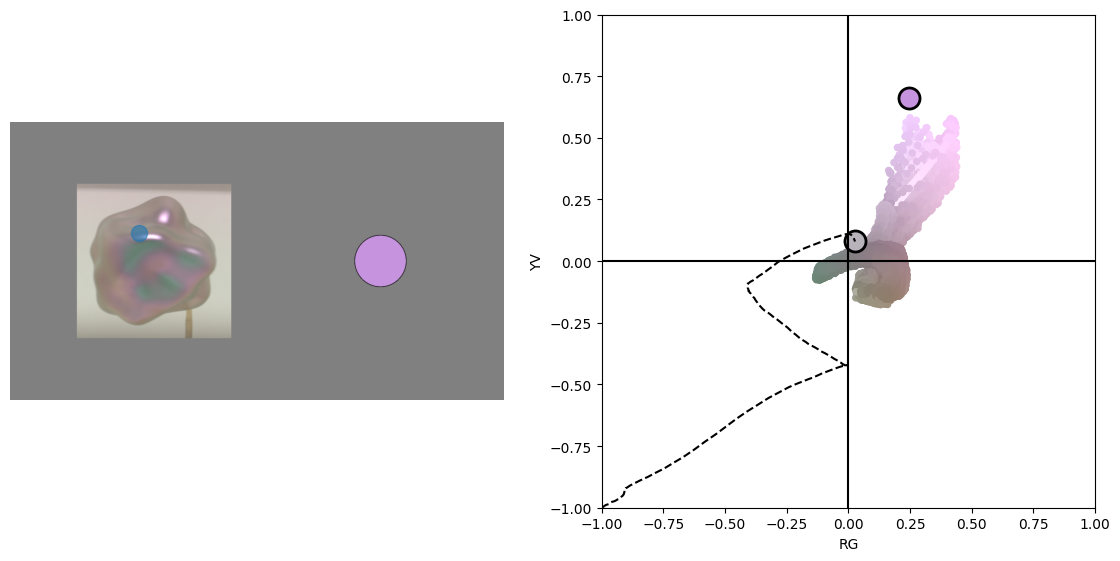

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# i = 419
fc = 0
for i in range(0, len(tstamps), 20):
    idx = np.where(abs(rel_world_stamps - tstamps[i]) < 0.02)[0]

    ax[0].cla()
    ax[0].axis('off')
    ax[0].imshow(screen_img)
    ax[0].scatter(xs[idx]*grid[1], ys[idx]*grid[0], s=point_scale[idx], alpha=0.6)

    curr_dkl = dkl_trajectory[i, :]
    curr_rgb = np.sqrt(robsblobs.dkl.dkl2rgb(mon_sRGB, curr_dkl))

    ax[1].cla()
    ax[1].plot([0, 0], [-1, 1], 'k-')
    ax[1].plot([-1, 1], [0, 0], 'k-')
    ax[1].scatter(dkl_obj[1, :], dkl_obj[2, :], s=20, c=rgbs_obj.T)
    ax[1].plot(dkl_trajectory[:i, 1], dkl_trajectory[:i, 2], 'k--')
    ax[1].scatter(curr_dkl[1], curr_dkl[2], s=230, color=curr_rgb, linewidths=2, edgecolors="black")
    ax[1].scatter(final_dkl[1], final_dkl[2], s=230, color=final_rgb, linewidths=2, edgecolors="black")
    ax[1].set_xlim(-1, 1)
    ax[1].set_ylim(-1, 1)
    ax[1].set_xlabel('RG')
    ax[1].set_ylabel('YV')
    ax[1].set_aspect('equal', adjustable='box')

    fc += 1

    fig.savefig(f"movie/frame{fc}.png")